# Project: Wrangling and Analyze Data
>   **Project 4 - Ghadah Alabduljabbar**

## Table of Contents
- [Introduction](#intro)
- [Part I - Data Gathering](#gathering)
- [Part II - Assessing Data](#assessing)
- [Part III - Cleaning Data](#cleaning)
- [Part IV - Storing Data](#storing)
- [Part V - Analyzing and Visualizing Data](#analyzing)


<a id='intro'></a>
### Introduction

This project is about working on data from a popular Twitter account called WeRateDogs, which that rates people's dogs with humorous and funny comments about the dog, even though the ratings have a denominator of 10, the numerator is almost always greater than 10, which is one of the attractive things about the account.


In [1]:
import pandas as pd
import numpy as np
import requests
import json
import re
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

<a id='gathering'></a>
## Data Gathering
In the cell below, gather **all** three pieces of data for this project and load them in the notebook. **Note:** the methods required to gather each data are different.
1. Directly download the WeRateDogs Twitter archive data (twitter-archive-enhanced.csv)

In [2]:
df_WeRateDogs = pd.read_csv('twitter-archive-enhanced.csv')
df_WeRateDogs.head()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None


2. Use the Requests library to download the tweet image prediction (image_predictions.tsv)

In [3]:
URL = "https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv"
response = requests.get(URL)
open("image_predictions.tsv", "wb").write(response.content)
df_image_predictions = pd.read_csv("image_predictions.tsv", sep='\t')
df_image_predictions.head()

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True


3. Use the Tweepy library to query additional data via the Twitter API (tweet_json.txt)

In [4]:
%%script false --no-raise-error

import tweepy
from tweepy import OAuthHandler
import json
from timeit import default_timer as timer

# Query Twitter API for each tweet in the Twitter archive and save JSON in a text file
# These are hidden to comply with Twitter's API terms and conditions
consumer_key = 'HIDDEN'
consumer_secret = 'HIDDEN'
access_token = 'HIDDEN'
access_secret = 'HIDDEN'

auth = OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_secret)

api = tweepy.API(auth, wait_on_rate_limit=True)

# NOTE TO STUDENT WITH MOBILE VERIFICATION ISSUES:
# df_1 is a DataFrame with the twitter_archive_enhanced.csv file. You may have to
# change line 17 to match the name of your DataFrame with twitter_archive_enhanced.csv
# NOTE TO REVIEWER: this student had mobile verification issues so the following
# Twitter API code was sent to this student from a Udacity instructor
# Tweet IDs for which to gather additional data via Twitter's API
tweet_ids = df_1.tweet_id.values
len(tweet_ids)

# Query Twitter's API for JSON data for each tweet ID in the Twitter archive
count = 0
fails_dict = {}
start = timer()
# Save each tweet's returned JSON as a new line in a .txt file
with open('tweet_json.txt', 'w') as outfile:
    # This loop will likely take 20-30 minutes to run because of Twitter's rate limit
    for tweet_id in tweet_ids:
        count += 1
        print(str(count) + ": " + str(tweet_id))
        try:
            tweet = api.get_status(tweet_id, tweet_mode='extended')
            print("Success")
            json.dump(tweet._json, outfile)
            outfile.write('\n')
        except tweepy.TweepError as e:
            print("Fail")
            fails_dict[tweet_id] = e
            pass
end = timer()
print(end - start)
print(fails_dict)

In [5]:
with open('tweet-json.txt') as file:
    dic_tweet_json = []
    for line in file:
        dic_tweet_json.append(json.loads(line))
        
dic_tweet_json[0]

{'created_at': 'Tue Aug 01 16:23:56 +0000 2017',
 'id': 892420643555336193,
 'id_str': '892420643555336193',
 'full_text': "This is Phineas. He's a mystical boy. Only ever appears in the hole of a donut. 13/10 https://t.co/MgUWQ76dJU",
 'truncated': False,
 'display_text_range': [0, 85],
 'entities': {'hashtags': [],
  'symbols': [],
  'user_mentions': [],
  'urls': [],
  'media': [{'id': 892420639486877696,
    'id_str': '892420639486877696',
    'indices': [86, 109],
    'media_url': 'http://pbs.twimg.com/media/DGKD1-bXoAAIAUK.jpg',
    'media_url_https': 'https://pbs.twimg.com/media/DGKD1-bXoAAIAUK.jpg',
    'url': 'https://t.co/MgUWQ76dJU',
    'display_url': 'pic.twitter.com/MgUWQ76dJU',
    'expanded_url': 'https://twitter.com/dog_rates/status/892420643555336193/photo/1',
    'type': 'photo',
    'sizes': {'large': {'w': 540, 'h': 528, 'resize': 'fit'},
     'thumb': {'w': 150, 'h': 150, 'resize': 'crop'},
     'small': {'w': 540, 'h': 528, 'resize': 'fit'},
     'medium': {'w': 

In [6]:
tweets_list = []
for i in range(len(dic_tweet_json)):
    tweet = {'tweet_id': dic_tweet_json[i]['id'],'retweet_count': dic_tweet_json[i]['retweet_count'],\
             'favorite_count':dic_tweet_json[i]['favorite_count'] }
    tweets_list.append(tweet)

df_tweet_json = pd.DataFrame(tweets_list, columns=['tweet_id','retweet_count','favorite_count'])
df_tweet_json.head()

,tweet_id,retweet_count,favorite_count
0,892420643555336193,8853,39467
1,892177421306343426,6514,33819
2,891815181378084864,4328,25461
3,891689557279858688,8964,42908
4,891327558926688256,9774,41048


<a id='assessing'></a>

## Assessing Data
In this section, detect and document at least **eight (8) quality issues and two (2) tidiness issue**. You must use **both** visual assessment
programmatic assessement to assess the data.

**Note:** pay attention to the following key points when you access the data.

* You only want original ratings (no retweets) that have images. Though there are 5000+ tweets in the dataset, not all are dog ratings and some are retweets.
* Assessing and cleaning the entire dataset completely would require a lot of time, and is not necessary to practice and demonstrate your skills in data wrangling. Therefore, the requirements of this project are only to assess and clean at least 8 quality issues and at least 2 tidiness issues in this dataset.
* The fact that the rating numerators are greater than the denominators does not need to be cleaned. This [unique rating system](http://knowyourmeme.com/memes/theyre-good-dogs-brent) is a big part of the popularity of WeRateDogs.
* You do not need to gather the tweets beyond August 1st, 2017. You can, but note that you won't be able to gather the image predictions for these tweets since you don't have access to the algorithm used.



## Dataset 1: WeRateDogs Tweets

In [7]:
df_WeRateDogs.sample(20)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
1953,673662677122719744,NaN,NaN,2015-12-07 00:37:52 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Kendall. 12/10 would cuddle the hell o...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/673662677...,12,10,Kendall,None,None,None,None
2111,670442337873600512,NaN,NaN,2015-11-28 03:21:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Meet Koda. He's large. Looks very soft. Great ...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/670442337...,11,10,Koda,None,None,None,None
2059,671186162933985280,NaN,NaN,2015-11-30 04:37:05 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Sparky. That's his pancake now. He wil...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/671186162...,10,10,Sparky,None,None,None,None
1805,676942428000112642,NaN,NaN,2015-12-16 01:50:26 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Who leaves the last cupcake just sitting there...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/676942428...,9,10,None,None,None,None,None
976,750026558547456000,NaN,NaN,2016-07-04 18:00:41 +0000,"<a href=""https://about.twitter.com/products/tw...",Meet Jax &amp; Jil. Jil is yelling the pledge ...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/750026558...,10,10,Jax,None,None,None,None
1105,734912297295085568,NaN,NaN,2016-05-24 01:02:00 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Jax. He's a literal fluffball. Sneaky ...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/734912297...,10,10,Jax,None,None,None,None
1640,684147889187209216,NaN,NaN,2016-01-04 23:02:22 +0000,"<a href=""http://vine.co"" rel=""nofollow"">Vine -...",This is Sweets the English Bulldog. Waves back...,NaN,NaN,NaN,https://vine.co/v/ib2nTOEuuOI,12,10,Sweets,None,None,pupper,None
2216,668537837512433665,NaN,NaN,2015-11-22 21:13:35 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Spark. He's nervous. Other dog hasn't ...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/668537837...,8,10,Spark,None,None,None,None
361,829501995190984704,NaN,NaN,2017-02-09 01:27:41 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Leo. He was a skater pup. She said see...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/829501995...,12,10,Leo,None,None,None,None
492,813217897535406080,NaN,NaN,2016-12-26 03:00:30 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here is Atlas. He went all out this year. 13/1...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/813217897...,13,10,Atlas,None,None,None,None


In [8]:
df_WeRateDogs.shape

(2356, 17)

In [9]:
df_WeRateDogs.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   tweet_id                    2356 non-null   int64  
 1   in_reply_to_status_id       78 non-null     float64
 2   in_reply_to_user_id         78 non-null     float64
 3   timestamp                   2356 non-null   object 
 4   source                      2356 non-null   object 
 5   text                        2356 non-null   object 
 6   retweeted_status_id         181 non-null    float64
 7   retweeted_status_user_id    181 non-null    float64
 8   retweeted_status_timestamp  181 non-null    object 
 9   expanded_urls               2297 non-null   object 
 10  rating_numerator            2356 non-null   int64  
 11  rating_denominator          2356 non-null   int64  
 12  name                        2356 non-null   object 
 13  doggo                       2356 

In [10]:
df_WeRateDogs.isnull().sum()

tweet_id                         0
in_reply_to_status_id         2278
in_reply_to_user_id           2278
timestamp                        0
source                           0
text                             0
retweeted_status_id           2175
retweeted_status_user_id      2175
retweeted_status_timestamp    2175
expanded_urls                   59
rating_numerator                 0
rating_denominator               0
name                             0
doggo                            0
floofer                          0
pupper                           0
puppo                            0
dtype: int64

In [11]:
sum(df_WeRateDogs.duplicated())

0

In [12]:
sum(df_WeRateDogs['tweet_id'].duplicated())

0

In [13]:
df_WeRateDogs[df_WeRateDogs['retweeted_status_id'].isnull() == False]['text']

19      RT @dog_rates: This is Canela. She attempted s...
32      RT @Athletics: 12/10 #BATP https://t.co/WxwJmv...
36      RT @dog_rates: This is Lilly. She just paralle...
68      RT @dog_rates: This is Emmy. She was adopted t...
73      RT @dog_rates: Meet Shadow. In an attempt to r...
                              ...                        
1023    RT @dog_rates: This is Shaggy. He knows exactl...
1043    RT @dog_rates: Extremely intelligent dog here....
1242    RT @twitter: @dog_rates Awesome Tweet! 12/10. ...
2259    RT @dogratingrating: Exceptional talent. Origi...
2260    RT @dogratingrating: Unoriginal idea. Blatant ...
Name: text, Length: 181, dtype: object

In [14]:
df_WeRateDogs['rating_denominator'].value_counts()

10     2333
11        3
50        3
20        2
80        2
70        1
7         1
15        1
150       1
170       1
0         1
90        1
40        1
130       1
110       1
16        1
120       1
2         1
Name: rating_denominator, dtype: int64

In [15]:
df_WeRateDogs[df_WeRateDogs['rating_denominator'] != 10].shape[0]

23

In [16]:
df_WeRateDogs[df_WeRateDogs['rating_denominator'] != 10]['text'][1663]

"I'm aware that I could've said 20/16, but here at WeRateDogs we are very professional. An inconsistent rating scale is simply irresponsible"

In [17]:
df_WeRateDogs[df_WeRateDogs['rating_denominator'] != 10]['text'][1662]

'This is Darrel. He just robbed a 7/11 and is in a high speed police chase. Was just spotted by the helicopter 10/10 https://t.co/7EsP8LmSp5'

In [18]:
df_WeRateDogs[df_WeRateDogs['rating_denominator'] != 10]['text'][342]

'@docmisterio account started on 11/15/15'

In [19]:
df_WeRateDogs['name'].value_counts()

None          745
a              55
Charlie        12
Cooper         11
Lucy           11
             ... 
Dex             1
Ace             1
Tayzie          1
Grizzie         1
Christoper      1
Name: name, Length: 957, dtype: int64

In [20]:
df_WeRateDogs['name'].unique()

array(['Phineas', 'Tilly', 'Archie', 'Darla', 'Franklin', 'None', 'Jax',
       'Zoey', 'Cassie', 'Koda', 'Bruno', 'Ted', 'Stuart', 'Oliver',
       'Jim', 'Zeke', 'Ralphus', 'Canela', 'Gerald', 'Jeffrey', 'such',
       'Maya', 'Mingus', 'Derek', 'Roscoe', 'Waffles', 'Jimbo', 'Maisey',
       'Lilly', 'Earl', 'Lola', 'Kevin', 'Yogi', 'Noah', 'Bella',
       'Grizzwald', 'Rusty', 'Gus', 'Stanley', 'Alfy', 'Koko', 'Rey',
       'Gary', 'a', 'Elliot', 'Louis', 'Jesse', 'Romeo', 'Bailey',
       'Duddles', 'Jack', 'Emmy', 'Steven', 'Beau', 'Snoopy', 'Shadow',
       'Terrance', 'Aja', 'Penny', 'Dante', 'Nelly', 'Ginger', 'Benedict',
       'Venti', 'Goose', 'Nugget', 'Cash', 'Coco', 'Jed', 'Sebastian',
       'Walter', 'Sierra', 'Monkey', 'Harry', 'Kody', 'Lassie', 'Rover',
       'Napolean', 'Dawn', 'Boomer', 'Cody', 'Rumble', 'Clifford',
       'quite', 'Dewey', 'Scout', 'Gizmo', 'Cooper', 'Harold', 'Shikha',
       'Jamesy', 'Lili', 'Sammy', 'Meatball', 'Paisley', 'Albus',
       'Nept

In [21]:
df_WeRateDogs['doggo'].value_counts()

None     2259
doggo      97
Name: doggo, dtype: int64

In [22]:
df_WeRateDogs['floofer'].value_counts()

None       2346
floofer      10
Name: floofer, dtype: int64

In [23]:
df_WeRateDogs[(df_WeRateDogs['doggo'] == 'doggo') & (df_WeRateDogs['floofer'] == 'floofer')].shape[0]

1

In [24]:
df_WeRateDogs['pupper'].value_counts()

None      2099
pupper     257
Name: pupper, dtype: int64

In [25]:
df_WeRateDogs[(df_WeRateDogs['doggo'] == 'doggo') & (df_WeRateDogs['pupper'] == 'pupper')].shape[0]

12

In [26]:
df_WeRateDogs[(df_WeRateDogs['floofer'] == 'floofer') & (df_WeRateDogs['pupper'] == 'pupper')].shape[0]

0

In [27]:
df_WeRateDogs['puppo'].value_counts()

None     2326
puppo      30
Name: puppo, dtype: int64

In [28]:
df_WeRateDogs[(df_WeRateDogs['doggo'] == 'doggo') & (df_WeRateDogs['puppo'] == 'puppo')].shape[0]

1

In [29]:
df_WeRateDogs[(df_WeRateDogs['floofer'] == 'floofer') & (df_WeRateDogs['puppo'] == 'puppo')].shape[0]

0

In [30]:
df_WeRateDogs[(df_WeRateDogs['pupper'] == 'pupper') & (df_WeRateDogs['puppo'] == 'puppo')].shape[0]

0

## Dataset 2: Image Predictions

In [31]:
df_image_predictions.sample(50)

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
260,670783437142401025,https://pbs.twimg.com/media/CU8Z-OxXAAA-sd2.jpg,1,lacewing,0.381955,False,sulphur_butterfly,0.106810,False,leafhopper,0.068347,False
108,667878741721415682,https://pbs.twimg.com/media/CUTILFiWcAE8Rle.jpg,1,seat_belt,0.200373,False,miniature_pinscher,0.106003,True,schipperke,0.104733,True
1839,837482249356513284,https://pbs.twimg.com/media/C59VqMUXEAAzldG.jpg,2,birdhouse,0.541196,False,can_opener,0.121094,False,carton,0.056137,False
1314,754856583969079297,https://pbs.twimg.com/media/CnnKCKNWgAAcOB8.jpg,2,golden_retriever,0.872385,True,Labrador_retriever,0.099963,True,cocker_spaniel,0.006051,True
1201,741067306818797568,https://pbs.twimg.com/media/CkjMx99UoAM2B1a.jpg,1,golden_retriever,0.843799,True,Labrador_retriever,0.052956,True,kelpie,0.035711,True
474,675147105808306176,https://pbs.twimg.com/media/CV6atgoWcAEsdv6.jpg,1,golden_retriever,0.949215,True,Labrador_retriever,0.016765,True,flat-coated_retriever,0.010637,True
18,666268910803644416,https://pbs.twimg.com/media/CT8QCd1WEAADXws.jpg,1,desktop_computer,0.086502,False,desk,0.085547,False,bookcase,0.079480,False
309,671538301157904385,https://pbs.twimg.com/media/CVHIhi2WsAEgdKk.jpg,1,park_bench,0.194211,False,water_bottle,0.071870,False,beacon,0.053433,False
968,706346369204748288,https://pbs.twimg.com/media/Cc1yRE2WoAAgxFQ.jpg,1,Tibetan_mastiff,0.956462,True,Rottweiler,0.025381,True,Appenzeller,0.008679,True
1364,761371037149827077,https://pbs.twimg.com/tweet_video_thumb/CeBym7...,1,brown_bear,0.713293,False,Indian_elephant,0.172844,False,water_buffalo,0.038902,False


In [32]:
df_image_predictions.shape

(2075, 12)

In [33]:
df_image_predictions.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   tweet_id  2075 non-null   int64  
 1   jpg_url   2075 non-null   object 
 2   img_num   2075 non-null   int64  
 3   p1        2075 non-null   object 
 4   p1_conf   2075 non-null   float64
 5   p1_dog    2075 non-null   bool   
 6   p2        2075 non-null   object 
 7   p2_conf   2075 non-null   float64
 8   p2_dog    2075 non-null   bool   
 9   p3        2075 non-null   object 
 10  p3_conf   2075 non-null   float64
 11  p3_dog    2075 non-null   bool   
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


In [34]:
df_image_predictions.isnull().sum()

tweet_id    0
jpg_url     0
img_num     0
p1          0
p1_conf     0
p1_dog      0
p2          0
p2_conf     0
p2_dog      0
p3          0
p3_conf     0
p3_dog      0
dtype: int64

In [35]:
sum(df_image_predictions.duplicated())

0

In [36]:
sum(df_image_predictions['tweet_id'].duplicated())

0

In [37]:
df_image_predictions['p1'].unique()[:20]

array(['Welsh_springer_spaniel', 'redbone', 'German_shepherd',
       'Rhodesian_ridgeback', 'miniature_pinscher',
       'Bernese_mountain_dog', 'box_turtle', 'chow', 'shopping_cart',
       'miniature_poodle', 'golden_retriever', 'Gordon_setter',
       'Walker_hound', 'pug', 'bloodhound', 'Lhasa', 'English_setter',
       'hen', 'desktop_computer', 'Italian_greyhound'], dtype=object)

In [38]:
df_image_predictions['p2'].unique()[:20]

array(['collie', 'miniature_pinscher', 'malinois', 'redbone',
       'Rottweiler', 'English_springer', 'mud_turtle', 'Tibetan_mastiff',
       'shopping_basket', 'komondor', 'Yorkshire_terrier',
       'English_foxhound', 'bull_mastiff', 'German_shepherd', 'Shih-Tzu',
       'Newfoundland', 'cock', 'desk', 'toy_terrier', 'toy_poodle'],
      dtype=object)

In [39]:
df_image_predictions['p3'].unique()[:20]

array(['Shetland_sheepdog', 'Rhodesian_ridgeback', 'bloodhound',
       'miniature_pinscher', 'Doberman', 'Greater_Swiss_Mountain_dog',
       'terrapin', 'fur_coat', 'golden_retriever',
       'soft-coated_wheaten_terrier', 'Labrador_retriever', 'Pekinese',
       'Ibizan_hound', 'French_bulldog', 'malinois', 'Dandie_Dinmont',
       'borzoi', 'partridge', 'bookcase', 'basenji'], dtype=object)

## Dataset 3: Twitter API Data

In [40]:
df_tweet_json.sample(20)

,tweet_id,retweet_count,favorite_count
581,800388270626521089,3265,12456
508,812466873996607488,2231,8900
1878,675006312288268288,252,1057
196,854482394044301312,7608,31131
564,802265048156610565,1573,7039
622,796031486298386433,4284,12071
2080,670815497391357952,1708,3410
1685,681579835668455424,1489,3893
2225,668268907921326080,261,592
92,874057562936811520,4125,23134


In [41]:
df_tweet_json.shape

(2354, 3)

In [42]:
df_tweet_json.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2354 entries, 0 to 2353
Data columns (total 3 columns):
 #   Column          Non-Null Count  Dtype
---  ------          --------------  -----
 0   tweet_id        2354 non-null   int64
 1   retweet_count   2354 non-null   int64
 2   favorite_count  2354 non-null   int64
dtypes: int64(3)
memory usage: 55.3 KB


In [43]:
df_tweet_json.isnull().sum()

tweet_id          0
retweet_count     0
favorite_count    0
dtype: int64

In [44]:
sum(df_tweet_json.duplicated())

0

In [45]:
sum(df_tweet_json['tweet_id'].duplicated())

0

### Quality issues
1. Text column in df_WeRateDogs starts with RT @ which mean a user can retweet their own tweet

2. Missing values 2175 out of 2356 in retweeted_status_id, retweeted_status_user_id, retweeted_status_timestamp columns in df_WeRateDogs

3. Missing values 2278 out of 2356 in in_reply_to_status_id, in_reply_to_user_id columns in df_WeRateDogs

4. The rating_denominator in df_WeRateDogs has different values other than 10 which is invalid

5. The name in df_WeRateDogs has invalid values (None, a, an, O, all, the, by)

6. In df_WeRateDogs there is 1 dog who is both doggo and floofer, and 1 who is both doggo and puppo 

7. In df_WeRateDogs there are 12 dogs who are both doggo and pupper

8. The source column in df_WeRateDogs has herf tag with url

9. Different letter cases and symbols ("-", "_") in p1, p2, p3 columns in df_image_predictions

### Tidiness issues
1. Date and time in the timestamp column

2. There are 4 columns for dog type (doggo, floofer, pupper, puppo)

3. Join the 3 tables together

<a id='cleaning'></a>

## Cleaning Data
In this section, clean **all** of the issues you documented while assessing. 

**Note:** Make a copy of the original data before cleaning. Cleaning includes merging individual pieces of data according to the rules of [tidy data](https://cran.r-project.org/web/packages/tidyr/vignettes/tidy-data.html). The result should be a high-quality and tidy master pandas DataFrame (or DataFrames, if appropriate).

In [46]:
# Make copies of original pieces of data
df_WeRateDogs_clean = df_WeRateDogs.copy()
df_image_predictions_clean = df_image_predictions.copy()

-------------------------------------
#### Define:

- *Text column in df_WeRateDogs starts with RT @ which mean a user can retweet their own tweet*


We will remove retweets (text starting with RT @) by removing all rows that have values (not blank or non-null) in retweeted_status_id, retweeted_status_user_id, and retweeted_status_timestamp columns.

#### Code

In [47]:
df_WeRateDogs_clean = df_WeRateDogs_clean[df_WeRateDogs_clean['retweeted_status_id'].isnull()]
df_WeRateDogs_clean = df_WeRateDogs_clean[df_WeRateDogs_clean['retweeted_status_user_id'].isnull()]
df_WeRateDogs_clean = df_WeRateDogs_clean[df_WeRateDogs_clean['retweeted_status_timestamp'].isnull()]

#### Test

In [48]:
df_WeRateDogs_clean[df_WeRateDogs_clean['retweeted_status_id'].isnull() == False]['text']

Series([], Name: text, dtype: object)

-------------------------------------
#### Define:

- *Missing values 2175 out of 2356 in retweeted_status_id, retweeted_status_user_id, retweeted_status_timestamp columns in df_WeRateDogs*

- *Missing values 2278 out of 2356 in in_reply_to_status_id, in_reply_to_user_id columns in df_WeRateDogs*

Since There is a lot of missing values in these columns we will drop them

#### Code

In [49]:
df_WeRateDogs_clean.drop(columns=['retweeted_status_id', 'retweeted_status_user_id', 'retweeted_status_timestamp', \
                                 'in_reply_to_status_id', 'in_reply_to_user_id', 'expanded_urls'], inplace=True)

#### Test

In [50]:
df_WeRateDogs_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2175 entries, 0 to 2355
Data columns (total 11 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   tweet_id            2175 non-null   int64 
 1   timestamp           2175 non-null   object
 2   source              2175 non-null   object
 3   text                2175 non-null   object
 4   rating_numerator    2175 non-null   int64 
 5   rating_denominator  2175 non-null   int64 
 6   name                2175 non-null   object
 7   doggo               2175 non-null   object
 8   floofer             2175 non-null   object
 9   pupper              2175 non-null   object
 10  puppo               2175 non-null   object
dtypes: int64(3), object(8)
memory usage: 203.9+ KB


In [51]:
df_WeRateDogs_clean.isnull().sum()

tweet_id              0
timestamp             0
source                0
text                  0
rating_numerator      0
rating_denominator    0
name                  0
doggo                 0
floofer               0
pupper                0
puppo                 0
dtype: int64

-------------------------------------
#### Define:

- *The rating_denominator in df_WeRateDogs has different values other than 10 which is invalid*


As we only have 23 incorrect rows, rows that doesn't have 10 in their text column will be removed, and the rest will be modified in both values in rating_denominator and columns.

#### Code

In [52]:
df_WeRateDogs_clean[df_WeRateDogs_clean['rating_denominator'] != 10].shape[0]

22

In [53]:
sum((df_WeRateDogs_clean[df_WeRateDogs_clean['rating_denominator'] != 10]['text']).str.contains('/10'))

6

In [54]:
df_WeRateDogs_clean = df_WeRateDogs_clean.drop(df_WeRateDogs_clean[(df_WeRateDogs_clean['rating_denominator'] != 10) & \
                                          (df_WeRateDogs_clean['text'].str.contains('/10')== False)].index)


In [55]:
ss = df_WeRateDogs_clean[df_WeRateDogs_clean['rating_denominator'] != 10]

dic_10 = []

for index, row in ss.iterrows():
    num = row['text'][row['text'].index('/10')-2:row['text'].index('/10')+3].replace(" ", "")
    temp = {"index":index, 'rating_numerator' : num[0:num.index('/10')], 'rating_denominator' : 10 }
    dic_10.append(temp)
dic_10

[{'index': 313, 'rating_numerator': '13', 'rating_denominator': 10},
 {'index': 1068, 'rating_numerator': '14', 'rating_denominator': 10},
 {'index': 1165, 'rating_numerator': '13', 'rating_denominator': 10},
 {'index': 1202, 'rating_numerator': '11', 'rating_denominator': 10},
 {'index': 1662, 'rating_numerator': '10', 'rating_denominator': 10},
 {'index': 2335, 'rating_numerator': '9', 'rating_denominator': 10}]

In [56]:
for x in dic_10:
    df_WeRateDogs_clean['rating_numerator'][x['index']] = x['rating_numerator']
    df_WeRateDogs_clean['rating_denominator'][x['index']] = x['rating_denominator']

#### Test

In [57]:
df_WeRateDogs_clean[df_WeRateDogs_clean['rating_denominator'] != 10].shape[0]

0

In [58]:
df_WeRateDogs_clean.shape

(2159, 11)

-------------------------------------
#### Define:

- *The name in df_WeRateDogs has invalid values (None, a, an, O, all, the, by)*


We will replace all these invalid names with "Johndoe"

#### Code

In [59]:
df_WeRateDogs_clean['name'].value_counts()

None          667
a              54
Charlie        11
Lucy           11
Oliver         10
             ... 
Wishes          1
Rose            1
Theo            1
Fido            1
Christoper      1
Name: name, Length: 955, dtype: int64

In [60]:
df_WeRateDogs_clean['name'].nunique()

955

In [61]:
to_replace = {'None', 'a', 'an', 'O', 'all', 'the', 'by'}

for char in to_replace:
    df_WeRateDogs_clean['name'] = df_WeRateDogs_clean['name'].str.replace(char, "Johndoe")

#### Test

In [62]:
df_WeRateDogs_clean['name'].nunique()

951

In [63]:
df_WeRateDogs_clean['name'].value_counts()

Johndoe          731
Lucy              11
ChJohndoerlie     11
Cooper            10
Johndoeliver      10
                ... 
Wishes             1
Rose               1
Theo               1
Fido               1
Christoper         1
Name: name, Length: 951, dtype: int64

-------------------------------------
#### Define:

- *In df_WeRateDogs there is 1 dog who is both doggo and floofer, and 1 who is both doggo and puppo*

- *In df_WeRateDogs there are 12 dogs who are both doggo and pupper*

- *There are 4 columns for dog type (doggo, floofer, pupper, puppo)*


Since every dog belong to 1 type we will remove the rows that have more than 1 type and merge the 4 columns to one column name "dog_type", then drop the 4 columns

#### Code

In [64]:
df_WeRateDogs_clean.shape[0]

2159

In [65]:
df_WeRateDogs_clean = df_WeRateDogs_clean.drop(df_WeRateDogs_clean[(df_WeRateDogs_clean['doggo'] == 'doggo') & \
                                                                   (df_WeRateDogs_clean['floofer'] == 'floofer')].index)
df_WeRateDogs_clean = df_WeRateDogs_clean.drop(df_WeRateDogs_clean[(df_WeRateDogs_clean['doggo'] == 'doggo') & \
                                                                   (df_WeRateDogs_clean['puppo'] == 'puppo')].index)
df_WeRateDogs_clean = df_WeRateDogs_clean.drop(df_WeRateDogs_clean[(df_WeRateDogs_clean['doggo'] == 'doggo') & \
                                                                   (df_WeRateDogs_clean['pupper'] == 'pupper')].index)


In [66]:
df_WeRateDogs_clean.replace('None', np.nan, inplace=True)
    
df_WeRateDogs_clean['dog_type'] = df_WeRateDogs_clean[['doggo', 'floofer', 'pupper', 'puppo']].apply(lambda x: ','.join(x.dropna().astype(str)),axis=1)

df_WeRateDogs_clean['dog_type'].replace('', 'other', inplace=True)

df_WeRateDogs_clean.drop(columns=['doggo', 'floofer', 'pupper', 'puppo'], inplace=True)


#### Test

In [67]:
df_WeRateDogs_clean.shape

(2147, 8)

In [68]:
df_WeRateDogs_clean.head(1)

,tweet_id,timestamp,source,text,rating_numerator,rating_denominator,name,dog_type
0,892420643555336193,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,13,10,PhineJohndoes,other


In [69]:
df_WeRateDogs_clean['dog_type'].value_counts()

other      1815
pupper      224
doggo        75
puppo        24
floofer       9
Name: dog_type, dtype: int64

-------------------------------------
#### Define:

- *The source column in df_WeRateDogs has herf tag with url*



Remove the HTML tags and the urls

#### Code

In [70]:
df_WeRateDogs_clean['source'].value_counts()

<a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>     2015
<a href="http://vine.co" rel="nofollow">Vine - Make a Scene</a>                          90
<a href="http://twitter.com" rel="nofollow">Twitter Web Client</a>                       31
<a href="https://about.twitter.com/products/tweetdeck" rel="nofollow">TweetDeck</a>      11
Name: source, dtype: int64

In [71]:
df_WeRateDogs_clean['source'] = df_WeRateDogs_clean['source'].apply(lambda x: re.sub('<[^<]+?>', '', x))

#### Test

In [72]:
df_WeRateDogs_clean['source'].value_counts()

Twitter for iPhone     2015
Vine - Make a Scene      90
Twitter Web Client       31
TweetDeck                11
Name: source, dtype: int64

-------------------------------------
#### Define:

- *Different letter cases and symbols ("-", "_") in p1, p2, p3 columns in df_image_predictions*



Covert all strings to lower case letters and replace "-" with "_"

#### Code

In [73]:
df_image_predictions_clean['p3'].unique()[:20]

array(['Shetland_sheepdog', 'Rhodesian_ridgeback', 'bloodhound',
       'miniature_pinscher', 'Doberman', 'Greater_Swiss_Mountain_dog',
       'terrapin', 'fur_coat', 'golden_retriever',
       'soft-coated_wheaten_terrier', 'Labrador_retriever', 'Pekinese',
       'Ibizan_hound', 'French_bulldog', 'malinois', 'Dandie_Dinmont',
       'borzoi', 'partridge', 'bookcase', 'basenji'], dtype=object)

In [74]:
df_image_predictions_clean['p1'] = df_image_predictions_clean['p1'].str.lower()
df_image_predictions_clean['p2'] = df_image_predictions_clean['p2'].str.lower()
df_image_predictions_clean['p3'] = df_image_predictions_clean['p3'].str.lower()
df_image_predictions_clean['p1'] = df_image_predictions_clean['p1'].str.replace("-", "_")
df_image_predictions_clean['p2'] = df_image_predictions_clean['p2'].str.replace("-", "_")
df_image_predictions_clean['p3'] = df_image_predictions_clean['p3'].str.replace("-", "_")

#### Test

In [75]:
df_image_predictions_clean['p3'].unique()[:20]

array(['shetland_sheepdog', 'rhodesian_ridgeback', 'bloodhound',
       'miniature_pinscher', 'doberman', 'greater_swiss_mountain_dog',
       'terrapin', 'fur_coat', 'golden_retriever',
       'soft_coated_wheaten_terrier', 'labrador_retriever', 'pekinese',
       'ibizan_hound', 'french_bulldog', 'malinois', 'dandie_dinmont',
       'borzoi', 'partridge', 'bookcase', 'basenji'], dtype=object)

-------------------------------------
#### Define:

- *Date and time in the timestamp column*



Covert the timestamp column to Date, then split it into date and time columns, then drop the timestamp column

#### Code

In [76]:
df_WeRateDogs_clean['timestamp'].info()

<class 'pandas.core.series.Series'>
Int64Index: 2147 entries, 0 to 2355
Series name: timestamp
Non-Null Count  Dtype 
--------------  ----- 
2147 non-null   object
dtypes: object(1)
memory usage: 33.5+ KB


In [77]:
df_WeRateDogs_clean['date'] = pd.to_datetime(df_WeRateDogs_clean['timestamp']).dt.date
df_WeRateDogs_clean['time'] = pd.to_datetime(df_WeRateDogs_clean['timestamp']).dt.time

df_WeRateDogs_clean.drop(columns=['timestamp'], inplace=True)

#### Test

In [78]:
df_WeRateDogs_clean.head(1)

,tweet_id,source,text,rating_numerator,rating_denominator,name,dog_type,date,time
0,892420643555336193,Twitter for iPhone,This is Phineas. He's a mystical boy. Only eve...,13,10,PhineJohndoes,other,2017-08-01,16:23:56


-------------------------------------
#### Define:

- *Join the 3 tables together*



Using inner join based on tweet_id to join the 3 tabes into one

#### Code

In [79]:
first_df = pd.merge(df_WeRateDogs_clean, df_image_predictions_clean, how = 'inner', on = ['tweet_id'] )
df = pd.merge(first_df, df_tweet_json, how = 'inner', on = ['tweet_id'])

#### Test

In [80]:
df.head()

,tweet_id,source,text,rating_numerator,rating_denominator,name,dog_type,date,time,jpg_url,...,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog,retweet_count,favorite_count
0,892420643555336193,Twitter for iPhone,This is Phineas. He's a mystical boy. Only eve...,13,10,PhineJohndoes,other,2017-08-01,16:23:56,https://pbs.twimg.com/media/DGKD1-bXoAAIAUK.jpg,...,0.097049,False,bagel,0.085851,False,banana,0.076110,False,8853,39467
1,892177421306343426,Twitter for iPhone,This is Tilly. She's just checking pup on you....,13,10,Tilly,other,2017-08-01,00:17:27,https://pbs.twimg.com/media/DGGmoV4XsAAUL6n.jpg,...,0.323581,True,pekinese,0.090647,True,papillon,0.068957,True,6514,33819
2,891815181378084864,Twitter for iPhone,This is Archie. He is a rare Norwegian Pouncin...,12,10,Archie,other,2017-07-31,00:18:03,https://pbs.twimg.com/media/DGBdLU1WsAANxJ9.jpg,...,0.716012,True,malamute,0.078253,True,kelpie,0.031379,True,4328,25461
3,891689557279858688,Twitter for iPhone,This is Darla. She commenced a snooze mid meal...,13,10,DJohndoerlJohndoe,other,2017-07-30,15:58:51,https://pbs.twimg.com/media/DF_q7IAWsAEuuN8.jpg,...,0.170278,False,labrador_retriever,0.168086,True,spatula,0.040836,False,8964,42908
4,891327558926688256,Twitter for iPhone,This is Franklin. He would like you to stop ca...,12,10,FrJohndoenklin,other,2017-07-29,16:00:24,https://pbs.twimg.com/media/DF6hr6BUMAAzZgT.jpg,...,0.555712,True,english_springer,0.225770,True,german_short_haired_pointer,0.175219,True,9774,41048


In [81]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1970 entries, 0 to 1969
Data columns (total 22 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   tweet_id            1970 non-null   int64  
 1   source              1970 non-null   object 
 2   text                1970 non-null   object 
 3   rating_numerator    1970 non-null   object 
 4   rating_denominator  1970 non-null   int64  
 5   name                1970 non-null   object 
 6   dog_type            1970 non-null   object 
 7   date                1970 non-null   object 
 8   time                1970 non-null   object 
 9   jpg_url             1970 non-null   object 
 10  img_num             1970 non-null   int64  
 11  p1                  1970 non-null   object 
 12  p1_conf             1970 non-null   float64
 13  p1_dog              1970 non-null   bool   
 14  p2                  1970 non-null   object 
 15  p2_conf             1970 non-null   float64
 16  p2_dog

-------------------------------------
<a id='storing'></a>

## Storing Data
Save gathered, assessed, and cleaned master dataset to a CSV file named "twitter_archive_master.csv".

In [82]:
df.to_csv('twitter_archive_master.csv', index=False,)

<a id='analyzing'></a>
## Analyzing and Visualizing Data
In this section, analyze and visualize your wrangled data.

In [83]:
df = pd.read_csv('twitter_archive_master.csv')
df.head()

,tweet_id,source,text,rating_numerator,rating_denominator,name,dog_type,date,time,jpg_url,...,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog,retweet_count,favorite_count
0,892420643555336193,Twitter for iPhone,This is Phineas. He's a mystical boy. Only eve...,13,10,PhineJohndoes,other,2017-08-01,16:23:56,https://pbs.twimg.com/media/DGKD1-bXoAAIAUK.jpg,...,0.097049,False,bagel,0.085851,False,banana,0.076110,False,8853,39467
1,892177421306343426,Twitter for iPhone,This is Tilly. She's just checking pup on you....,13,10,Tilly,other,2017-08-01,00:17:27,https://pbs.twimg.com/media/DGGmoV4XsAAUL6n.jpg,...,0.323581,True,pekinese,0.090647,True,papillon,0.068957,True,6514,33819
2,891815181378084864,Twitter for iPhone,This is Archie. He is a rare Norwegian Pouncin...,12,10,Archie,other,2017-07-31,00:18:03,https://pbs.twimg.com/media/DGBdLU1WsAANxJ9.jpg,...,0.716012,True,malamute,0.078253,True,kelpie,0.031379,True,4328,25461
3,891689557279858688,Twitter for iPhone,This is Darla. She commenced a snooze mid meal...,13,10,DJohndoerlJohndoe,other,2017-07-30,15:58:51,https://pbs.twimg.com/media/DF_q7IAWsAEuuN8.jpg,...,0.170278,False,labrador_retriever,0.168086,True,spatula,0.040836,False,8964,42908
4,891327558926688256,Twitter for iPhone,This is Franklin. He would like you to stop ca...,12,10,FrJohndoenklin,other,2017-07-29,16:00:24,https://pbs.twimg.com/media/DF6hr6BUMAAzZgT.jpg,...,0.555712,True,english_springer,0.225770,True,german_short_haired_pointer,0.175219,True,9774,41048


In [84]:
df.describe()

,tweet_id,rating_numerator,rating_denominator,img_num,p1_conf,p2_conf,p3_conf,retweet_count,favorite_count
count,1.970000e+03,1970.000000,1970.0,1970.000000,1970.000000,1.970000e+03,1.970000e+03,1970.000000,1970.000000
mean,7.356333e+17,11.700508,10.0,1.204061,0.592616,1.350295e-01,6.041528e-02,2760.939086,8885.426904
std,6.757927e+16,40.913225,0.0,0.562935,0.272020,1.008177e-01,5.099559e-02,4674.438635,12219.395294
min,6.660209e+17,0.000000,10.0,1.000000,0.044333,1.011300e-08,1.740170e-10,16.000000,81.000000
25%,6.757183e+17,10.000000,10.0,1.000000,0.360437,5.435947e-02,1.621080e-02,620.000000,1947.000000
50%,7.081144e+17,11.000000,10.0,1.000000,0.587026,1.186490e-01,4.975535e-02,1344.500000,4096.500000
75%,7.873791e+17,12.000000,10.0,1.000000,0.841932,1.955692e-01,9.166433e-02,3223.000000,11326.500000
max,8.924206e+17,1776.000000,10.0,4.000000,1.000000,4.880140e-01,2.734190e-01,79515.000000,132810.000000


In [85]:
df.describe(include=['O'])

,source,text,name,dog_type,date,time,jpg_url,p1,p2,p3
count,1970,1970,1970,1970,1970,1970,1970,1970,1970,1970
unique,3,1970,928,5,593,1920,1970,374,397,405
top,Twitter for iPhone,This is Phineas. He's a mystical boy. Only eve...,Johndoe,other,2015-11-28,01:00:05,https://pbs.twimg.com/media/DGKD1-bXoAAIAUK.jpg,golden_retriever,labrador_retriever,labrador_retriever
freq,1931,1,593,1675,26,3,1,132,91,75


In [86]:
df['rating_denominator'] = df['rating_denominator'].astype("int64")
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1970 entries, 0 to 1969
Data columns (total 22 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   tweet_id            1970 non-null   int64  
 1   source              1970 non-null   object 
 2   text                1970 non-null   object 
 3   rating_numerator    1970 non-null   int64  
 4   rating_denominator  1970 non-null   int64  
 5   name                1970 non-null   object 
 6   dog_type            1970 non-null   object 
 7   date                1970 non-null   object 
 8   time                1970 non-null   object 
 9   jpg_url             1970 non-null   object 
 10  img_num             1970 non-null   int64  
 11  p1                  1970 non-null   object 
 12  p1_conf             1970 non-null   float64
 13  p1_dog              1970 non-null   bool   
 14  p2                  1970 non-null   object 
 15  p2_conf             1970 non-null   float64
 16  p2_dog

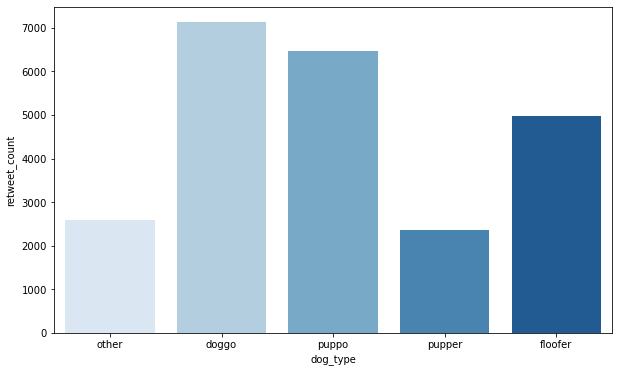

In [87]:
ax = sns.barplot(y='retweet_count', x='dog_type',data=df, palette='Blues', ci=None) # it shows the average 
ax.figure.set_size_inches(10,6);

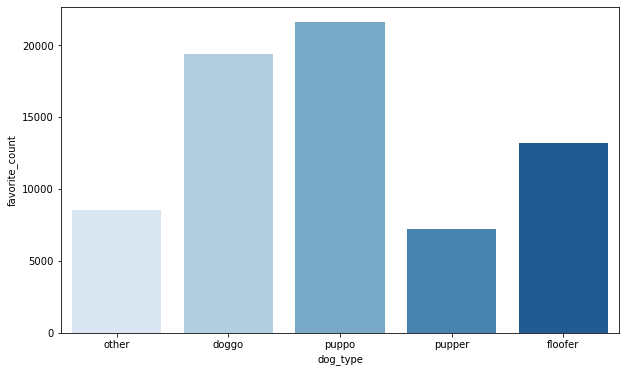

In [88]:
ax = sns.barplot(y='favorite_count', x='dog_type',data=df, palette='Blues', ci=None) # it shows the average 
ax.figure.set_size_inches(10,6);

Looking at the bar charts above, we can see that:
- Dog-type doggo and puppo have higher popularity than other types, as they have higher retweets and favorite counts than the rest.
- Dog-type pupper is the least popular as it has the lowest retweets and favorite counts.


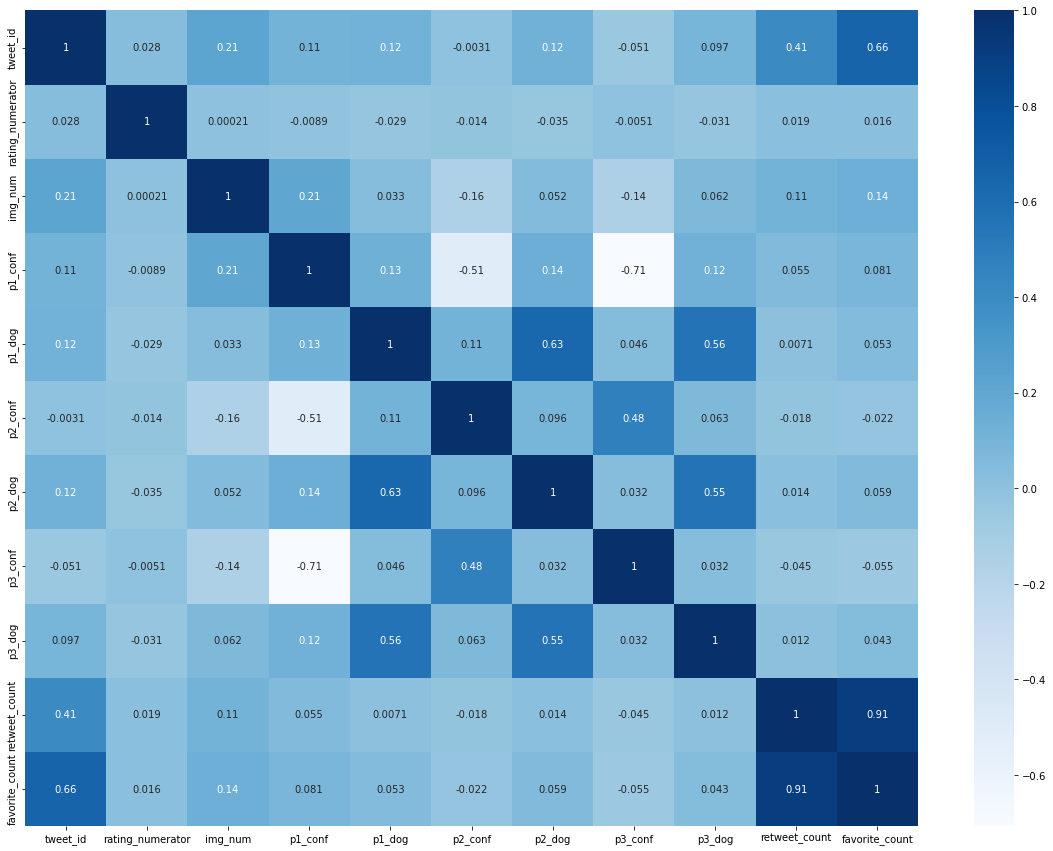

In [89]:
df_cor = df.copy()
df_cor.drop(columns=['rating_denominator'], inplace=True)
plt.figure(figsize = (20,15)) 
sns.heatmap(df_cor.corr(), annot=True, cmap="Blues");

Looking at the heatmap above, we can see that:
- There is a strong negative correlation **-0.71** between p1_conf and p3_conf, which is interesting as it means that the confidence level of the prediction algorithm is opposite for their #1 and #3 predictions.
- There is a strong positive correlation **0.91** between retweet_count and favorit_count, which reflects the more popular the tweet is the higher both retweet and favorite counts.